In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
data = np.load('src/data/datacln.npy', allow_pickle = True)

In [5]:
df = pd.DataFrame(data, columns = ['title','author', 'isbn', 'book_type', 'pages', 'userid', 'user_rating', 'num_rate', 'av_rate'])  

#get rid of any users who haven't added any books, and any added books with no user rating
dfwr = df.dropna(axis=0)
actually_rated = dfwr['user_rating'] != 0
dfwr = dfwr[actually_rated]
dfwr.info()
#dfwr.head()
#dfwr.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36471 entries, 2 to 52342
Data columns (total 9 columns):
title          36471 non-null object
author         36471 non-null object
isbn           36471 non-null object
book_type      36471 non-null object
pages          36471 non-null object
userid         36471 non-null object
user_rating    36471 non-null object
num_rate       36471 non-null object
av_rate        36471 non-null object
dtypes: object(9)
memory usage: 2.8+ MB


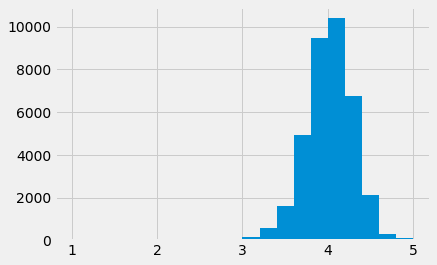

In [41]:
dfwr['av_rate'].hist(bins = 20)
plt.show()



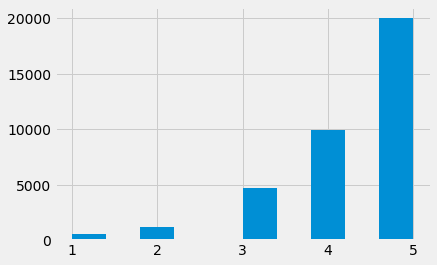

In [42]:
dfwr['user_rating'].hist()
plt.show()

# Hypothesis Testing

### Null hypothesis

The null hypothesis is that goodreads raters rate books under 4 stars more often than they rate books 4 and 5 stars. 

P(x<4) > .5

In [120]:
null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample)/np.sqrt(len(sample)), size=len(sample), random_state=None)
null_mean = np.mean(null_hyp)

###  Alternative Hypothesis

the alternative hypothesis is that goodreads raters rate books 4 and 5 more than 1,2 or 3 stars

P(x>=4)>.5

In [7]:
#sample is all of our user ratings, sampling was done as part of the scraping randomized list operation
sample =dfwr['user_rating']

dumby = sample
samp_mean = np.mean(sample)

In [113]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [1]:
#Graph the null hypothesis

fig, ax = plt.subplots()

ax.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')


ax.set_title('Mean Ratings under null Hypothesis')
ax.set_ylabel('number of ratings')
ax.set_xlabel("since people are not rational, we will assume \n that they're giving 4 star reviews with the most frequency.")
ax.axvline(null_mean, label = 'null Hyp mean')



# ax[1] = plt.hist(sample, color = 'c', bins = 5, alpha = .4, label ='sample')

# fig.set_title ('sampled ratings against hypothesised ratings')


ax.legend(loc='upper left', frameon = False)
# fig.xlabel('number of ratings')
plt.show()

fig.savefig('img/hypothesis_test', dpi = 300, bbox_inches = 'tight', transparent = True)

NameError: name 'plt' is not defined

Graph the data

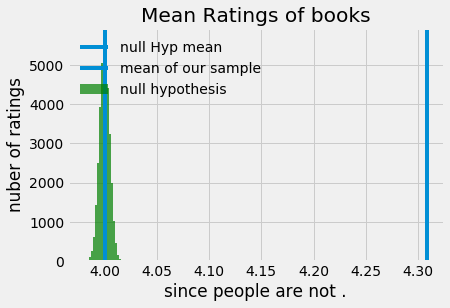

In [130]:
#Graph the null hypothesis with sample mean

fig, ax = plt.subplots()

ax.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')


ax.set_title('Mean Ratings of books')
ax.set_ylabel('number of ratings')
ax.set_xlabel("since people are not .")
ax.axvline(x=np.mean(null_hyp), label = 'null Hyp mean')
ax.axvline(samp_mean, label= 'mean of our sample')



# ax[1] = plt.hist(sample, color = 'c', bins = 5, alpha = .4, label ='sample')

# fig.set_title ('sampled ratings against hypothesised ratings')


ax.legend(loc='upper left', frameon = False)
# fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/hypothesis_test', dpi = 300, bbox_inches = 'tight', transparent = True)

In [136]:
stats.ttest_1samp(sample, 4, axis=0, nan_policy='propagate')

Ttest_1sampResult(statistic=63.68260309755819, pvalue=0.0)

In [6]:
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
uniform_hyp = stats.uniform.rvs(loc=0, scale=5, size=len(sample), random_state=None)
fig, ax = plt.subplots()

ax.hist(uniform_hyp, color = 'g', bins = 5, alpha = .7, label = 'null hypothesis')
ax.hist(sample, color = 'c', bins = 5, alpha = .0, label ='sample')



ax.set_title('uniform ratings')
ax.set_ylabel('number of ratings')
ax.set_xlabel("the sort of bins we would expect, if people were perfectly rational. Which we're obviously not.")

#ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

fig.savefig('img/uniform_rational_graph2', dpi = 300, bbox_inches = 'tight', transparent = True)

NameError: name 'sample' is not defined

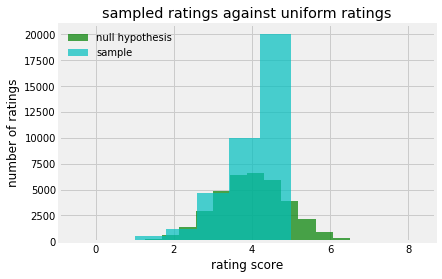

In [8]:
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
null_hyp = stats.norm.rvs(loc=4, scale=np.std(sample), size=len(sample), random_state=None)
fig, ax = plt.subplots()

ax = plt.hist(null_hyp, color = 'g', bins = 20, alpha = .7, label = 'null hypothesis')
ax = sample.hist(color = 'c', bins = 5, alpha = .7, label ='sample')

ax.set_title('sampled ratings against uniform ratings')
ax.set_ylabel('number of ratings')
ax.set_xlabel('rating score')

ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

fig.savefig('img/hypothesis_graph', dpi = 300, bbox_inches = 'tight', transparent = True)

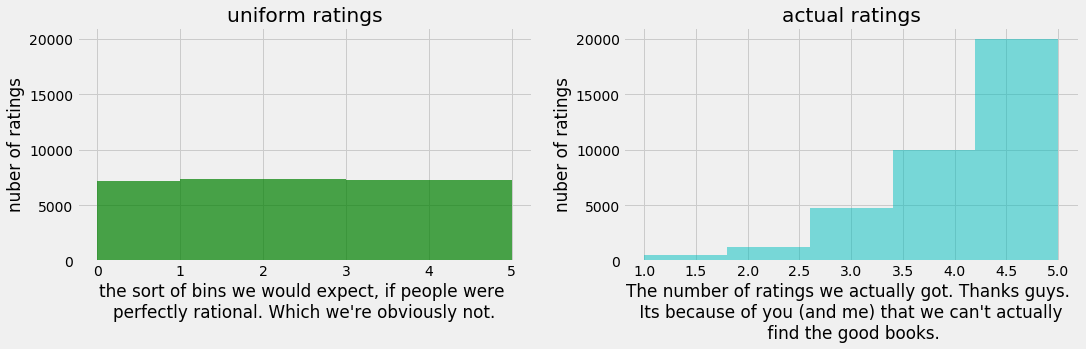

In [160]:
# graph the sample and the hypothesis(a uniform distribution of the same size as the sample)
uniform_hyp = stats.uniform.rvs(loc=0, scale=5, size=len(sample), random_state=None)
fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].hist(uniform_hyp, color = 'g', bins = 5, alpha = .7, label = 'null hypothesis')
ax[0].hist(sample, color = 'c', bins = 5, alpha = .0, label ='sample')


ax[0].set_title('uniform ratings')
ax[0].set_ylabel('nuber of ratings')
ax[0].set_xlabel("the sort of bins we would expect, if people were \nperfectly rational. Which we're obviously not.")

ax[1].hist(sample, color = 'c', bins = 5, alpha = .5, label ='sample')


ax[1].set_title('actual ratings')
ax[1].set_ylabel('nuber of ratings')
ax[1].set_xlabel("The number of ratings we actually got. Thanks guys. \n Its because of you (and me) that we can't actually \n find the good books.")

#ax.legend(loc='upper left', frameon = False)
#fig.xlabel('number of ratings')
plt.show()

#fig.savefig('img/Thanks_guys', dpi = 300, bbox_inches = 'tight', transparent = True)